# Data Plots

This notebook is designed to visualize the results of various configurations. It reads the results from CSV files, processes them, and generates plots to compare different metrics across configurations.

# Imports and dependencies

This section imports the required libraries for data manipulation and visualization.

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input variables

This section defines the base directory where the results are stored and if an llm model has been used during tests.

In [87]:
base_dir = "output/generation/hardware_tests"
use_llm = False

# Searching for files

This section searches for all CSV files that contain results in the specified directory and its subdirectories. The files are expected to be named "results.csv".

In [88]:
results_files = []
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith("results.csv"):
            results_files.append(os.path.join(root, file))

# Reading and processing the data

This section reads each results file into a DataFrame, extracts the configuration name from the file path, and appends it to a list. Finally, it concatenates all DataFrames into a single DataFrame for further analysis.

In [89]:
df_list = []
for filepath in results_files:
    config_name = os.path.basename(os.path.dirname(filepath))
    df = pd.read_csv(filepath)
    df["config"] = config_name
    df_list.append(df)
    
combined_df = pd.concat(df_list, ignore_index=True)

# Metrics to plot

This section defines the metrics to be plotted based on whether an LLM model was used during the tests. If `use_llm` is set to `True`, additional metrics related to the LLM are included.

In [90]:
if use_llm:
    metrics_to_plot = ["rougeL", "rougeL_golden", "bleu", "bleu_golden", "longest_match", "longest_match_golden"]
else:
    metrics_to_plot = ["rougeL", "bleu", "longest_match"]
    
mean_metrics = combined_df.groupby("config")[metrics_to_plot].mean().reset_index()

# Plotting the metrics

This section reshapes the DataFrame for plotting and generates a bar plot to compare the specified metrics across different configurations. The plot is saved as an image file.

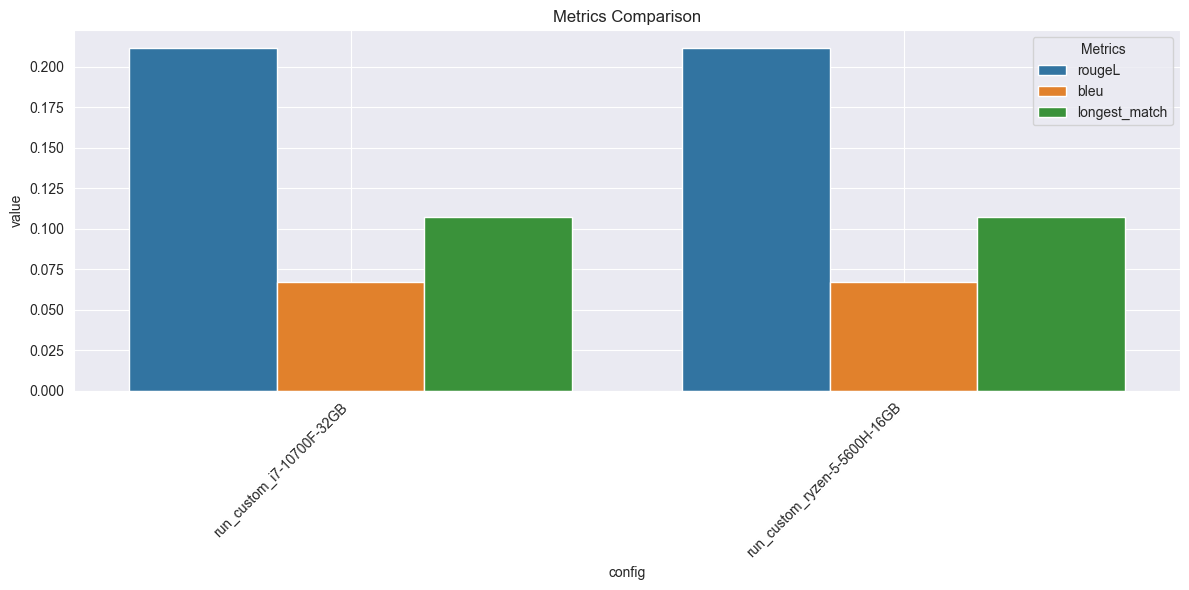

In [91]:
long_df = mean_metrics.melt(id_vars="config", var_name="Metrics", value_name="value")

plt.figure(figsize=(12, 6))
sns.barplot(data=long_df, x="config", y="value", hue="Metrics")
plt.xticks(rotation=45, ha="right")
plt.title("Metrics Comparison")
plt.tight_layout()
plt.grid(True)


file_name = os.path.split(base_dir)[-1]
plt.savefig(os.path.join(base_dir, f"{file_name}_plot.png"))
plt.show()